In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
'''id – Уникальный идентификатор объекта недвижимости.

date – Дата продажи дома 

price – Цена продажи дома 

bedrooms – Количество спален.

bathrooms – Количество ванных комнат 

sqft_living – Жилая площадь в квадратных футах 

sqft_lot – Общая площадь участка в квадратных футах.

floors – Количество этажей.

waterfront – Наличие выхода к воде 

view – Оценка вида из дома 

grade – Оценка качества дома 

sqft_above – Площадь над землёй (без подвала).

sqft_basement – Площадь подвала.

yr_built – Год постройки дома.

yr_renovated – Год последнего ремонта (0 = не было ремонта).

zipcode – Почтовый индекс.

lat – Широта.

long – Долгота.

sqft_living15 – Средняя жилая площадь 15 ближайших соседних домов.

sqft_lot15 – Средняя площадь участка 15 ближайших соседних домов.'''

'id – Уникальный идентификатор объекта недвижимости.\n\ndate – Дата продажи дома \n\nprice – Цена продажи дома \n\nbedrooms – Количество спален.\n\nbathrooms – Количество ванных комнат \n\nsqft_living – Жилая площадь в квадратных футах \n\nsqft_lot – Общая площадь участка в квадратных футах.\n\nfloors – Количество этажей.\n\nwaterfront – Наличие выхода к воде \n\nview – Оценка вида из дома \n\ngrade – Оценка качества дома \n\nsqft_above – Площадь над землёй (без подвала).\n\nsqft_basement – Площадь подвала.\n\nyr_built – Год постройки дома.\n\nyr_renovated – Год последнего ремонта (0 = не было ремонта).\n\nzipcode – Почтовый индекс.\n\nlat – Широта.\n\nlong – Долгота.\n\nsqft_living15 – Средняя жилая площадь 15 ближайших соседних домов.\n\nsqft_lot15 – Средняя площадь участка 15 ближайших соседних домов.'

In [4]:
'''Целевое значение находится в колонке price, которое мы и будеми прогнозировать'''

'Целевое значение находится в колонке price, которое мы и будеми прогнозировать'

In [5]:
df_no_duplicates = df.drop_duplicates()
print(f'До: {df.shape[0]} \nПосле: {df_no_duplicates.shape[0]}')

До: 21613 
После: 21613


In [18]:
df_label = df.copy()
object_cols = df_label.select_dtypes(include=['int64', 'float64']).columns

print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


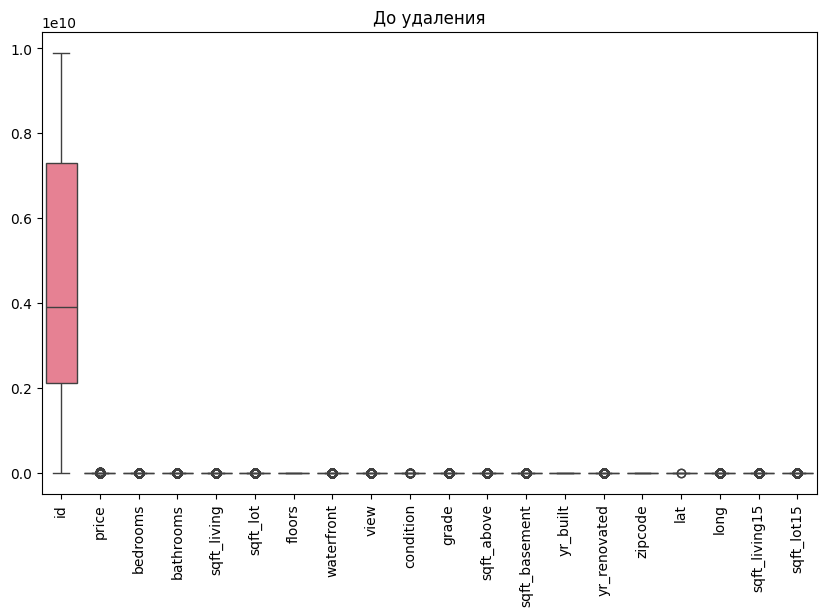

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_label)
plt.title('До удаления')
plt.xticks(rotation=90)
plt.show()

In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
numeric_cols = df_label.select_dtypes(include=['number']).columns.tolist()

df_clean = df_label.copy()
for col in numeric_cols:
    df_clean = remove_outliers(df_clean, col)

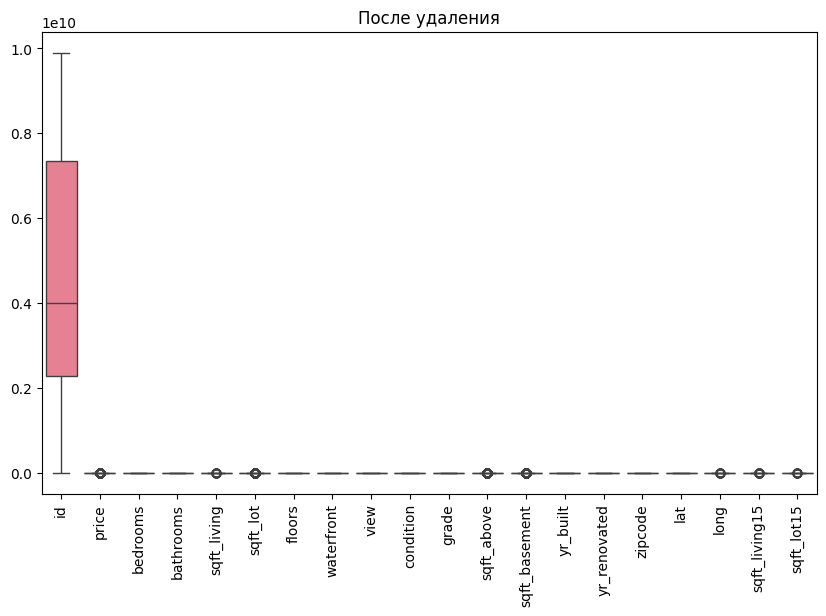

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)
plt.title('После удаления')
plt.xticks(rotation=90)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_encoded = df.copy()

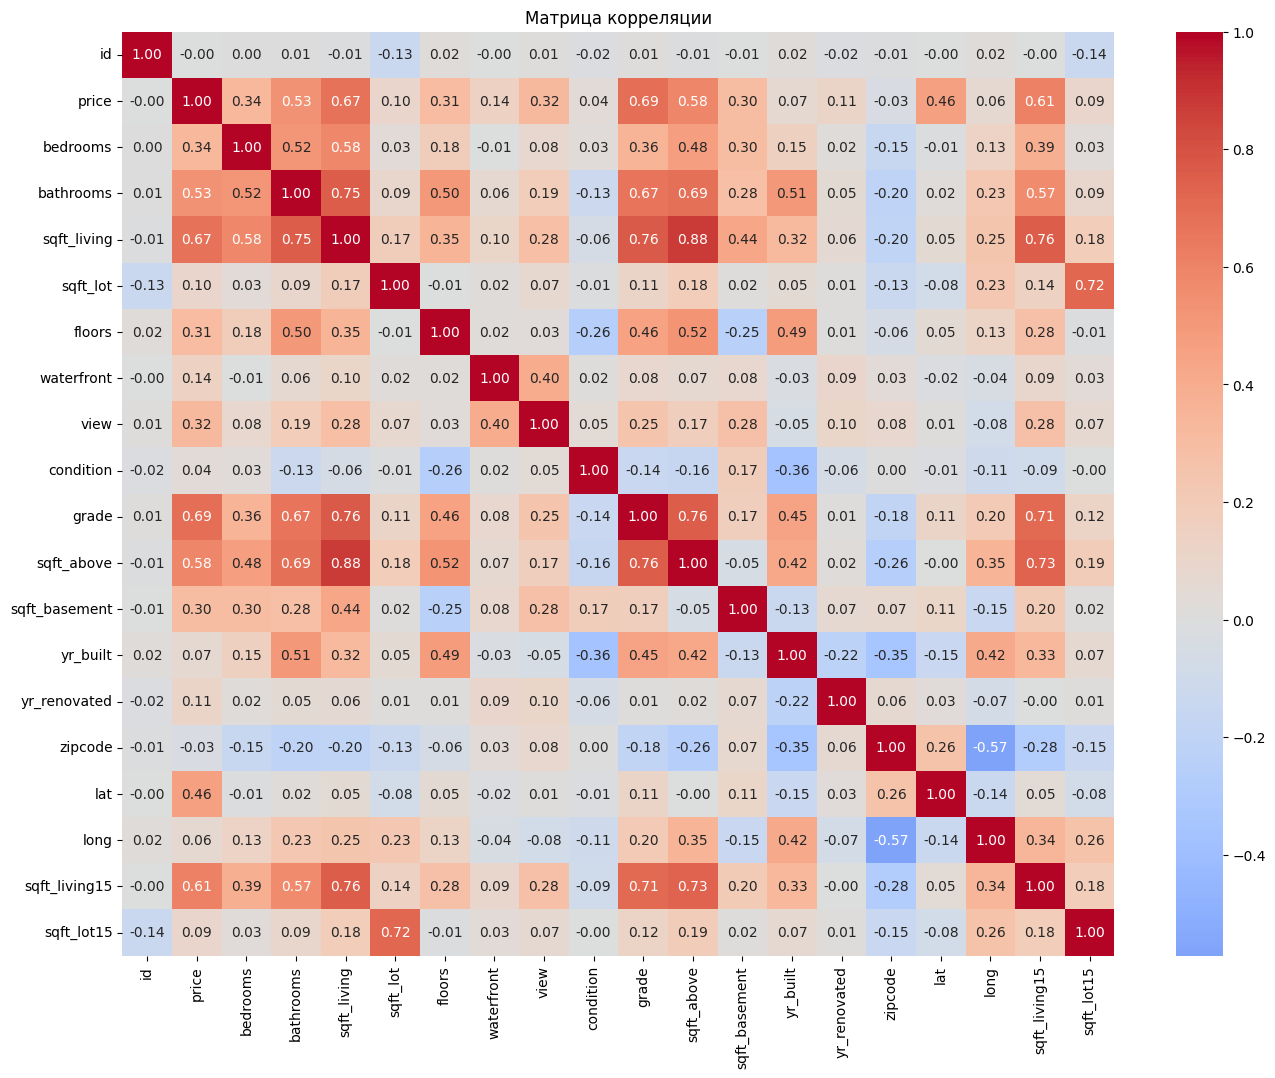

In [26]:
corr_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0)
plt.title('Матрица корреляции')
plt.show()

In [27]:
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            col_name = corr_matrix.columns[i]
            high_corr.add(col_name)
            print(f"Высокая корреляция между {corr_matrix.columns[j]} и {col_name}: {corr_matrix.iloc[i, j]:.2f}")

Высокая корреляция между price и bathrooms: 0.53
Высокая корреляция между bedrooms и bathrooms: 0.52
Высокая корреляция между price и sqft_living: 0.67
Высокая корреляция между bedrooms и sqft_living: 0.58
Высокая корреляция между bathrooms и sqft_living: 0.75
Высокая корреляция между bathrooms и floors: 0.50
Высокая корреляция между price и grade: 0.69
Высокая корреляция между bathrooms и grade: 0.67
Высокая корреляция между sqft_living и grade: 0.76
Высокая корреляция между price и sqft_above: 0.58
Высокая корреляция между bathrooms и sqft_above: 0.69
Высокая корреляция между sqft_living и sqft_above: 0.88
Высокая корреляция между floors и sqft_above: 0.52
Высокая корреляция между grade и sqft_above: 0.76
Высокая корреляция между bathrooms и yr_built: 0.51
Высокая корреляция между zipcode и long: -0.57
Высокая корреляция между price и sqft_living15: 0.61
Высокая корреляция между bathrooms и sqft_living15: 0.57
Высокая корреляция между sqft_living и sqft_living15: 0.76
Высокая корреля

In [31]:
print("Количество нулевых значений:")
print(df.isnull().sum())

Количество нулевых значений:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


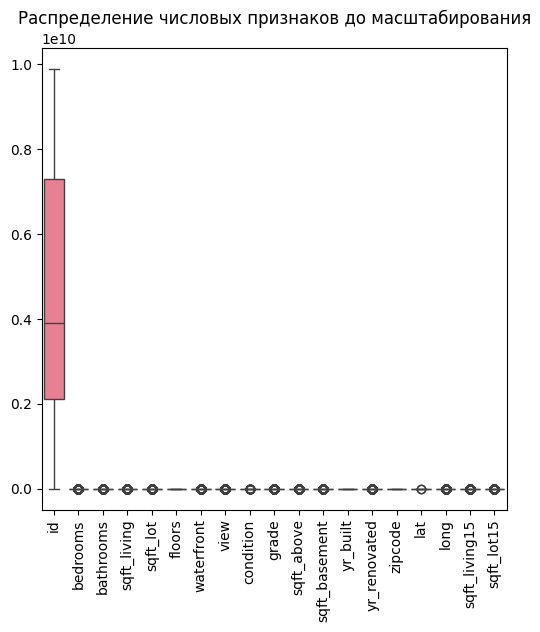

In [42]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'price' in numeric_cols:
    numeric_cols.remove('price')

plt.figure(figsize=(6, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Распределение числовых признаков до масштабирования')
plt.xticks(rotation=90)
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

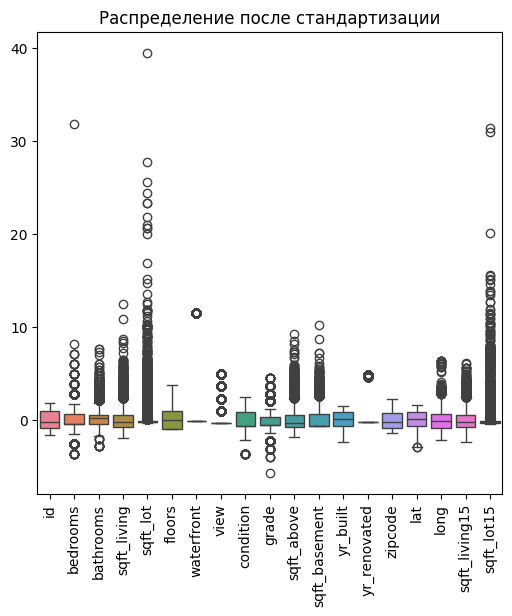

In [44]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_scaled[numeric_cols])
plt.title(f'Распределение после {"стандартизации"}')
plt.xticks(rotation=90)
plt.show()

In [45]:
'''Категориальных признаков нет'''

'Категориальных признаков нет'

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr, spearmanr


X = df.drop('price', axis=1) 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
#Линейная регрессия без регуляции
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
pearson_lr = pearsonr(y_test, y_pred_lr)
spearman_lr = spearmanr(y_test, y_pred_lr)

print(f"Линейная регрессия: \nMAE={mae_lr:.2f},\nMSE={mse_lr:.2f}")
print(f"Корреляция Пирсона: r={pearson_lr[0]:.2f}, p-value={pearson_lr[1]:.2f}")
print(f"Корреляция Спирмена: rho={spearman_lr[0]:.2f}, p-value={spearman_lr[1]:.2f}")

Линейная регрессия: 
MAE=127474.10,
MSE=45164817780.90
Корреляция Пирсона: r=0.84, p-value=0.00
Корреляция Спирмена: rho=0.86, p-value=0.00


In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split

numeric_cols = df.select_dtypes(include=['object']).columns
df = df[numeric_cols].fillna(0)


ridge_params = {
    'alpha': np.logspace(-3, 3, 7),  # [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

ridge = GridSearchCV(
    Ridge(),
    param_grid=ridge_params,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,  
    n_jobs=-1,
    refit='MSE'
)

ridge.fit(X_train, y_train)

y_pred = ridge.best_estimator_.predict(X_test)

print("\nЛучшие параметры:", ridge.best_params_)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {ridge.best_estimator_.score(X_test, y_test):.2f}")

pearson_corr, pearson_p = pearsonr(y_test, y_pred)
spearman_corr, spearman_p = spearmanr(y_test, y_pred)

print(f"\nКорреляция Пирсона: {pearson_corr:.2f} (p-value: {pearson_p:.4f})")
print(f"Корреляция Спирмена: {spearman_corr:.2f} (p-value: {spearman_p:.4f})")

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Лучшие параметры: {'alpha': np.float64(0.1), 'solver': 'auto'}
MAE: 127473.63
MSE: 45166007290.06
R2 Score: 0.70

Корреляция Пирсона: 0.84 (p-value: 0.0000)
Корреляция Спирмена: 0.86 (p-value: 0.0000)


C:\Users\redmi\My_projects\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.98912e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [66]:
'''Выбор метрики MSE для лучшей оптимизации линейной регрессии RIDGE.
В результате у нас получилась сильная линейная зависимость с небольшими средними ошибками прогноза.
p-value = 0 следует, связь статистически значима'''

'Выбор метрики MSE для лучшей оптимизации линейной регрессии RIDGE.\nВ результате у нас получилась сильная линейная зависимость с небольшими средними ошибками прогноза.\np-value = 0 следует, связь статистически значима'